# Project 15 Auto_MPG_Prediction
-->Aim is to predict the Auto's Miles Per Gallon prediction

## Lets Load the Important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Lets Load the dataset

In [3]:
data=pd.read_csv("AutoMPG.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
data['origin'].unique()

array([1, 3, 2], dtype=int64)

In [5]:
data['car name'].value_counts()

ford pinto                     6
amc matador                    5
toyota corolla                 5
ford maverick                  5
amc gremlin                    4
                              ..
toyouta corona mark ii (sw)    1
plymouth valiant custom        1
audi fox                       1
datsun 210 mpg                 1
toyota cressida                1
Name: car name, Length: 305, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## Checking Missing Values

In [7]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
data["horsepower"].fillna(data["horsepower"].median(), inplace=True)

In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Statistical Summary

In [10]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


From the above we can see that displacement and horsepower have a significant difference between max and 50th, and mean.

## Lets Check the correlation of data

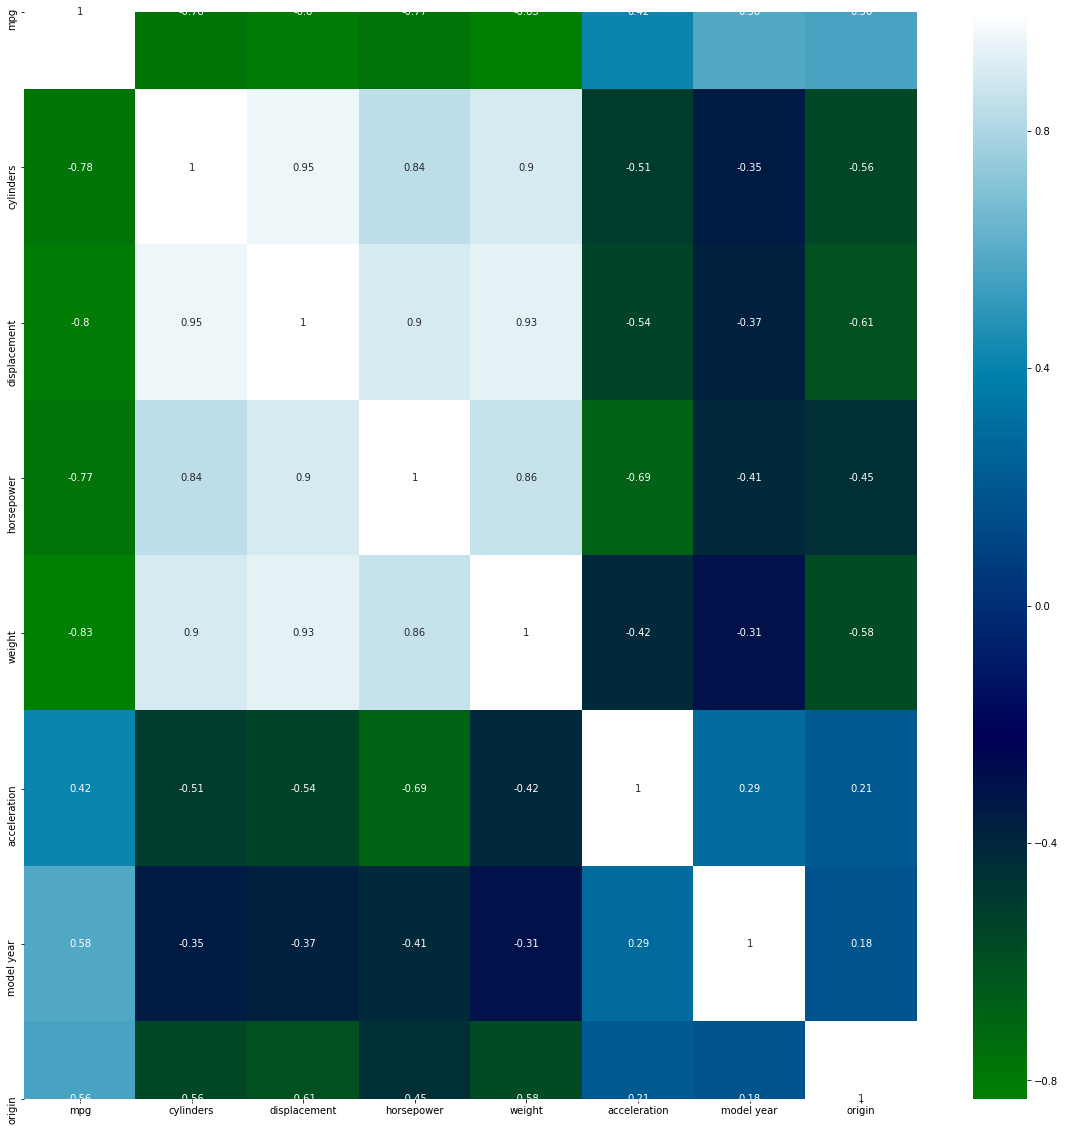

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, cmap='ocean')

From the above we can see that cylinders,displacement,horsepower,weight are highly correlated with eachother, however some of important independent features have negative correlation with out dependent variables which is not good for our model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020FBA5A5408>,
      dtype=object)

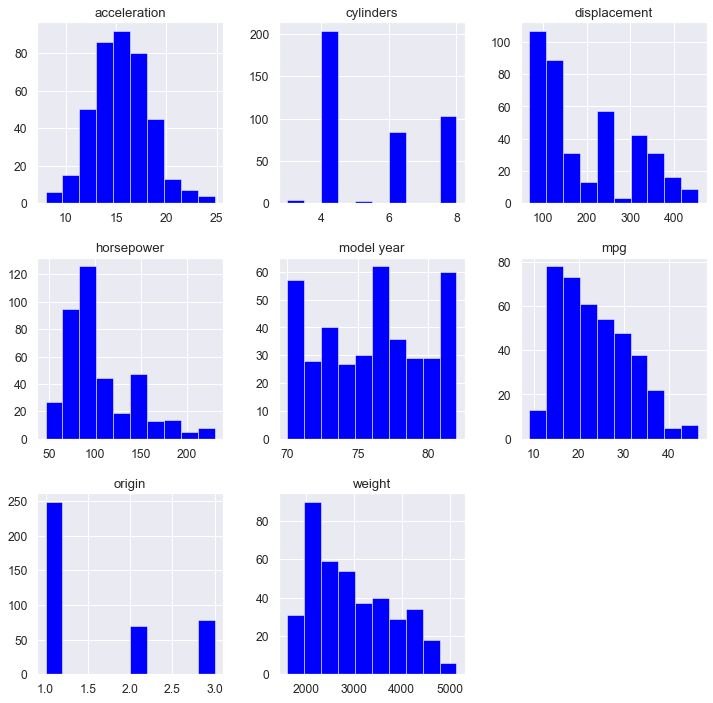

In [11]:
sns.set(style="darkgrid", palette='deep', font_scale=1.1)
data.hist(figsize=(12,12), color='blue',edgecolor='white',linewidth=0.5)

From the above sets of graphs we can see that most of the graphs are postively skewed.

In [10]:
data.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64

In [11]:
for index in data.skew().index:
    if data.skew().loc[index]>0.55:
        data[index]=np.sqrt(data[index])

In [12]:
data.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.469855
horsepower      0.747385
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.823555
dtype: float64

## Lets do the EDA

Text(0.5, 1.0, 'Cylinders vs mpg')

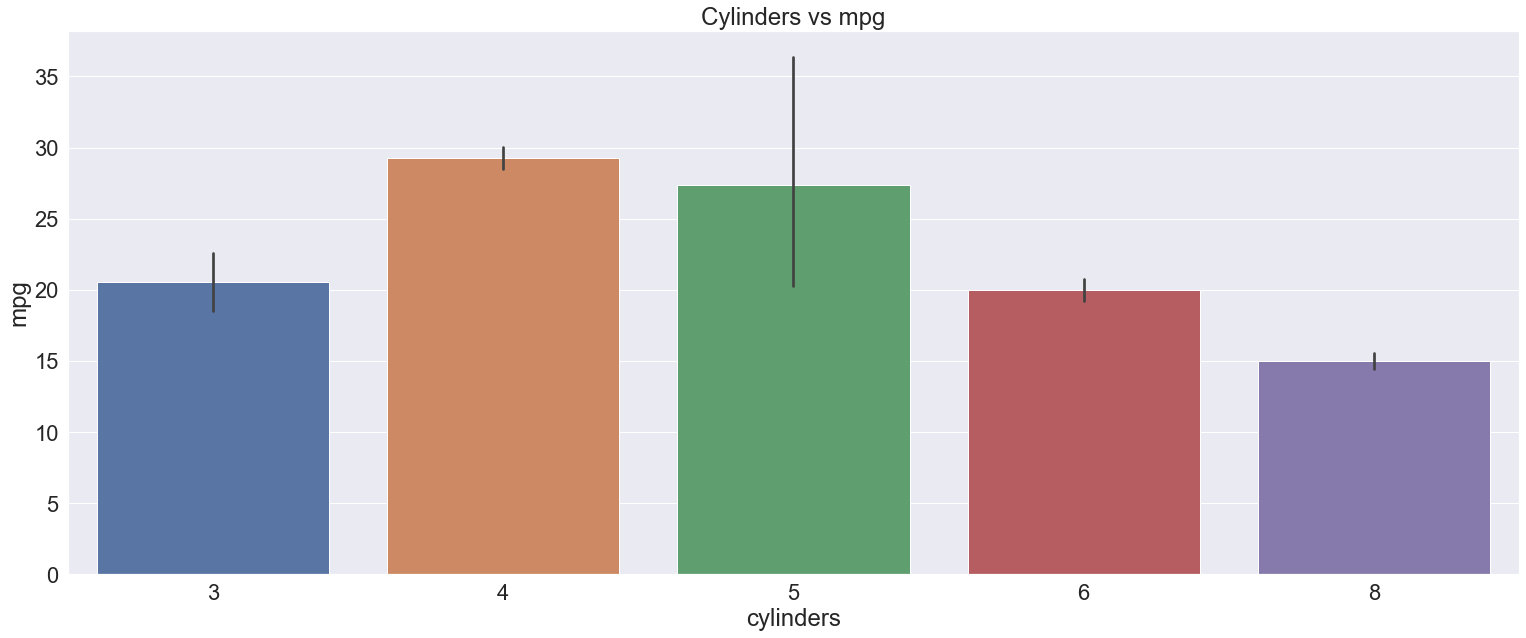

In [15]:
sns.set(font_scale=2)
plt.figure(figsize=(26,10))
sns.barplot(x='cylinders',y='mpg',data=data)
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title('Cylinders vs mpg')

From the above we can see that the cars with 4 and 5 cylinders have greater miles per gallon from the rest and cars with 4 cylinders have highest miles per gallon. 

Text(0.5, 1.0, 'Cylinders vs horsepower')

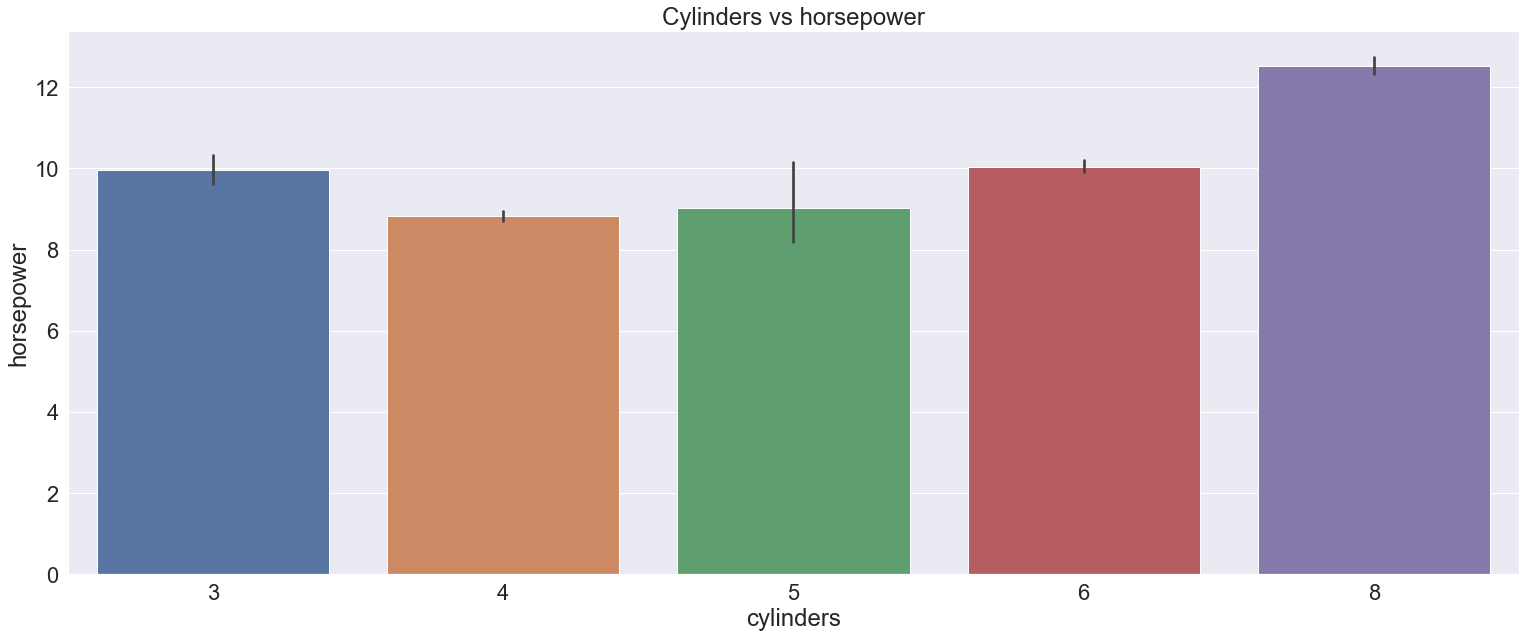

In [16]:
sns.set(font_scale=2)
plt.figure(figsize=(26,10))
sns.barplot(x='cylinders',y='horsepower',data=data)
plt.xlabel('cylinders')
plt.ylabel('horsepower')
plt.title('Cylinders vs horsepower')

From the above we can see that as the cylinder increases the horsepower also increases, but we can see some drop on 4 cylinders.

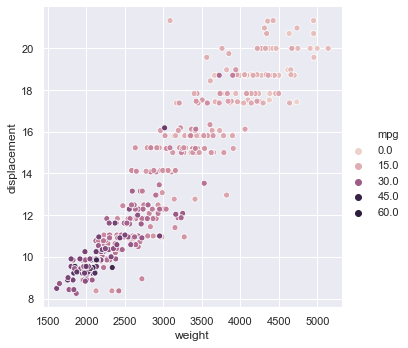

In [17]:
sns.set(font_scale=1)
sns.relplot(x='weight',y='displacement',hue='mpg',data=data)

From the above we can see that the as the weight increases the miles per gallon decreases, and as weight increases displacement also increases. 

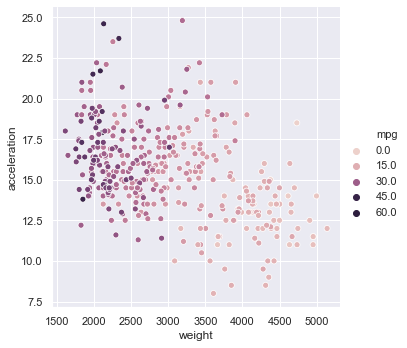

In [18]:
sns.relplot(x='weight',y='acceleration',hue='mpg',data=data)

From the above we can see that as the acceleration and miles per gallons increases for car models have low weights.

Text(0.5, 1.0, 'model year vs mpg')

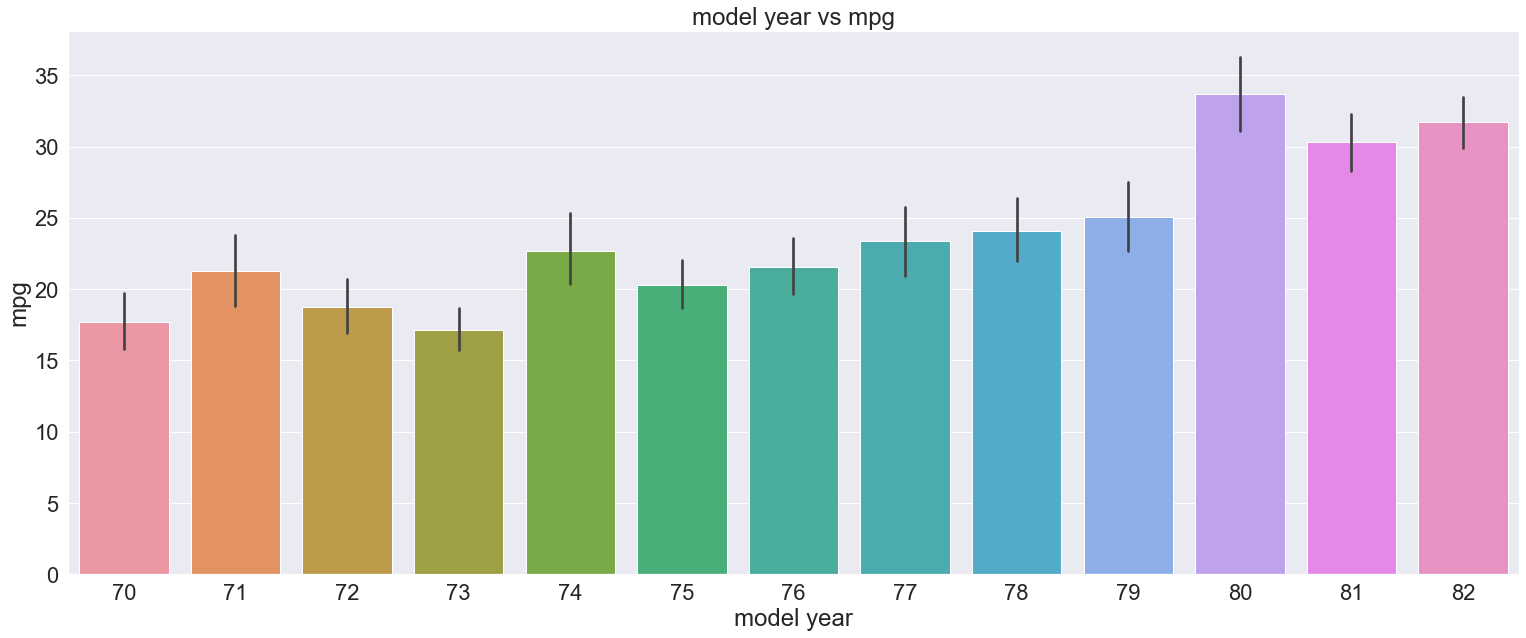

In [19]:
sns.set(font_scale=2)
plt.figure(figsize=(26,10))
sns.barplot(x='model year',y='mpg',data=data)
plt.xlabel('model year')
plt.ylabel('mpg')
plt.title('model year vs mpg')

From the above we can see that as the model year increases miles per gallon also increases.

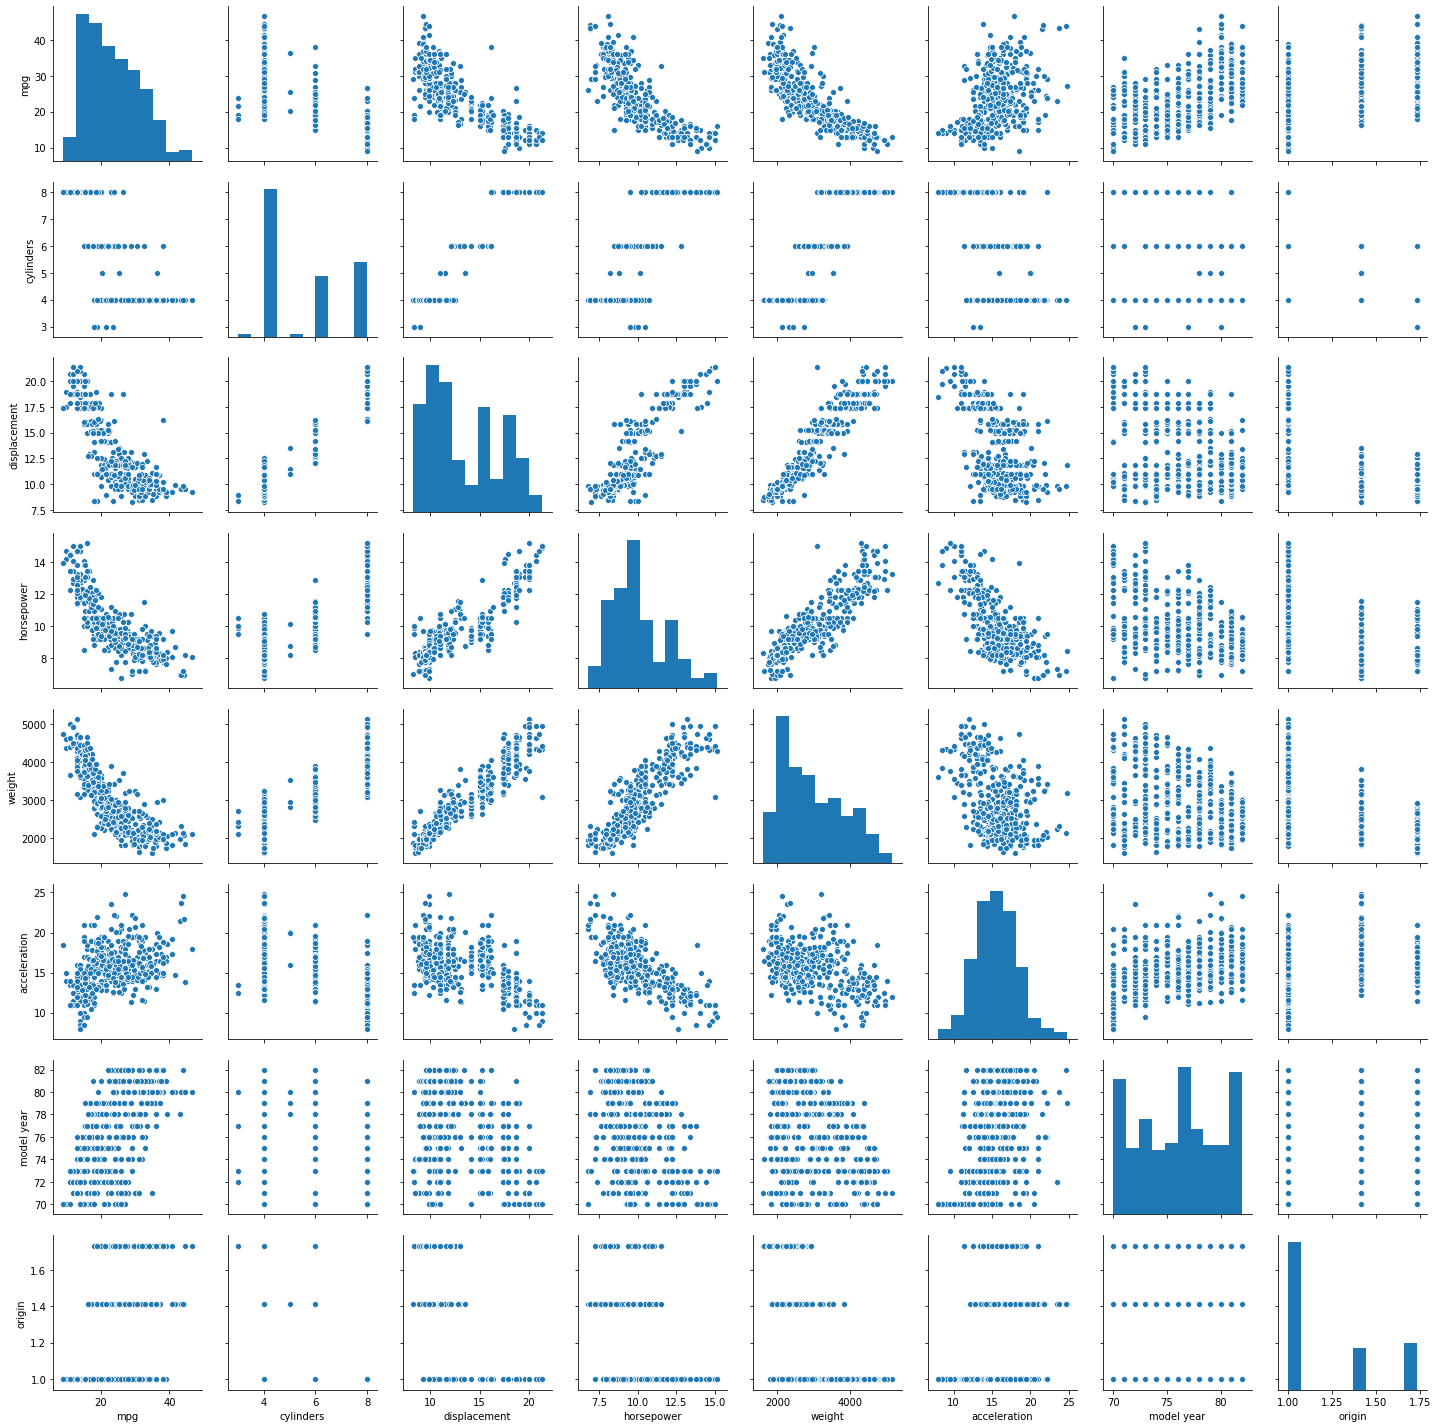

In [14]:
sns.pairplot(data)

## Lets Split and Scale the data

In [13]:
data.drop(['car name'],axis=1,inplace=True)
x=data.iloc[:,1:]
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,17.521415,11.401754,3504,12.0,70,1.0
1,8,18.708287,12.845233,3693,11.5,70,1.0
2,8,17.832555,12.247449,3436,11.0,70,1.0
3,8,17.435596,12.247449,3433,12.0,70,1.0
4,8,17.378147,11.832160,3449,10.5,70,1.0


In [14]:
y=data['mpg']
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=56)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((318, 7), (80, 7), (318,), (80,))

## Lets Implement ML Alogrithms

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score

In [19]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=56)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=56)
RFR=RandomForestRegressor(random_state=56)
GBR=GradientBoostingRegressor(random_state=56)

In [20]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [21]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pr=model.predict(x_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.8357970034534566
Mean_Squared_Error = 11.377440902338872
Mean_Absolute_Error = 2.5912216746129877
Root_Mean_Squared_Error = 3.3730462348356376
Cross_Val_Score =  0.6177998714010479


------------------------------------- Lasso -------------------------------
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.8062086040380333
Mean_Squared_Error = 13.427587810884216
Mean_Absolute_Error = 2.5813983525517052
Root_Mean_Squared_Error = 3.6643673138598176
Cross_Val_Score =  0.5704691588726105


------------------------------------- Ridge -------------------------------
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, ra

In [22]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.835797,11.377441,2.591222,3.373046,0.617800
1,Lasso,0.806209,13.427588,2.581398,3.664367,0.570469
2,Ridge,0.836306,11.342162,2.577773,3.367813,0.618629
3,DecisionTreeRegressor,0.737052,18.219375,2.978750,4.268416,0.552498
4,AdaBoostRegressor,0.863636,9.448497,2.418194,3.073841,0.720298
5,RandomForestRegressor,0.889022,7.689529,1.982875,2.773000,0.717679
6,GradientBoostingRegressor,0.899298,6.977550,1.924719,2.641505,0.745783


From the above models we can see that both GradientBoosting Regressor and RandomForest Regressor are performing good,so lets try hypertunning these two models, if we can achive R2_score more than 90%.

## Lets HyperTune our RandomForestRegressor.

In [62]:
from sklearn.model_selection import GridSearchCV
RFRpara={
    "n_estimators"     :[10,30,50,80,100,150,200,250],
    "max_features"     :["auto","sqrt","log2"],
    "min_samples_split":[2,4],
    "bootstrap"        :[True,False],
    }
gFR=GridSearchCV(RFR,param_grid=RFRpara,n_jobs=1,cv=10)
gFR.fit(x_train,y_train)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=56,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=1,
             param_grid={'bootstrap': [True, False],
           

In [66]:
gFR.best_score_ , gFR.best_params_

(0.8460356144210264,
 {'bootstrap': True,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 50})

In [64]:
paramGBR={'n_estimators':[100,150,200,300,400,500], 
            'learning_rate': [0.1,0.05,0.02,0.01],
            'max_depth':[2], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=paramGBR, n_jobs=1, cv=10)
gridGBR.fit(x_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_ite...
                             

In [65]:
gridGBR.best_score_ , gridGBR.best_params_

(0.8448377292342647,
 {'learning_rate': 0.02,
  'max_depth': 2,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 500})

From the above we can see that even by hyper parameter tunning we didn't got better score, so we choose Gradient Boosting Regressor as our final model, as r2 score is high mean squred error is low and cross val score is high. 

In [23]:
from sklearn.externals import joblib
joblib.dump(GBR,'Auto_MPG_prediction.obj')

F:\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['Auto_MPG_prediction.obj']

In [24]:
model=joblib.load('Auto_MPG_prediction.obj')

In [27]:
predictions=model.predict(x_test)

In [31]:
pre = pd.DataFrame(predictions)
pre.columns = ["prediction"]
pre.to_csv("Auto_MPG_prediction_results.csv")